In [1]:
##Data collection ##

In [2]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=quandl.get('WIKI/AAPL')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [6]:
df=df[['Close']]
df.head()

,Close
Date,
1980-12-12,28.75
1980-12-15,27.25
1980-12-16,25.25
1980-12-17,25.87
1980-12-18,26.63


In [7]:
df.shape

(9400, 1)

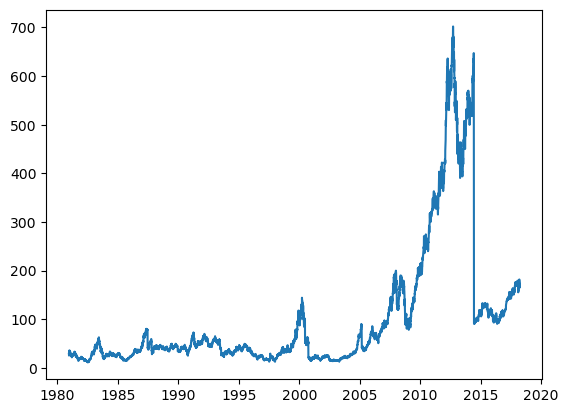

In [8]:
plt.plot(df)

In [9]:
df.head()

,Close
Date,
1980-12-12,28.75
1980-12-15,27.25
1980-12-16,25.25
1980-12-17,25.87
1980-12-18,26.63


In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df['Scaled Close']=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df.head()

,Close,Scaled Close
Date,,
1980-12-12,28.75,0.025684
1980-12-15,27.25,0.023513
1980-12-16,25.25,0.020619
1980-12-17,25.87,0.021516
1980-12-18,26.63,0.022616


In [12]:
df=df[['Scaled Close']]

In [13]:
df.head()

,Scaled Close
Date,
1980-12-12,0.025684
1980-12-15,0.023513
1980-12-16,0.020619
1980-12-17,0.021516
1980-12-18,0.022616


In [14]:
#Splitting the dataset into training and testing
df.reset_index(drop=True, inplace=True)
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data, test_data = df.loc[0:training_size-1, :], df.loc[training_size:, :]


In [15]:
training_size, test_size

(6580, 2820)

In [19]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset.iloc[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset.iloc[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step=100
X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test= create_dataset(test_data,time_step)

In [25]:
X_train

array([[0.02568369, 0.02351324, 0.0206193 , ..., 0.02496021, 0.0247721 ,
        0.02370135],
       [0.02351324, 0.0206193 , 0.02151642, ..., 0.0247721 , 0.02370135,
        0.02423672],
       [0.0206193 , 0.02151642, 0.02261612, ..., 0.02370135, 0.02423672,
        0.02459847],
       ...,
       [0.0761829 , 0.07660252, 0.08023441, ..., 0.10684416, 0.10533931,
        0.10803068],
       [0.07660252, 0.08023441, 0.08244827, ..., 0.10533931, 0.10803068,
        0.10714802],
       [0.08023441, 0.08244827, 0.08188395, ..., 0.10803068, 0.10714802,
        0.10775575]])

In [22]:
X_train.shape

(6479, 100)

In [26]:
X_test.shape

(2719, 100)

In [27]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [29]:
#Create a stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50, batch_size=64,verbose=1)

Epoch 1/50
102/102 [==============================] - 13s 125ms/step - loss: 8.1808e-06 - val_loss: 4.7990e-04
Epoch 2/50
102/102 [==============================] - 13s 128ms/step - loss: 7.9509e-06 - val_loss: 4.3709e-04
Epoch 3/50
102/102 [==============================] - 13s 128ms/step - loss: 7.3191e-06 - val_loss: 7.0834e-04
Epoch 4/50
102/102 [==============================] - 13s 129ms/step - loss: 7.8185e-06 - val_loss: 4.5864e-04
Epoch 5/50
102/102 [==============================] - 13s 129ms/step - loss: 7.5868e-06 - val_loss: 7.2385e-04
Epoch 6/50
102/102 [==============================] - 13s 130ms/step - loss: 8.2887e-06 - val_loss: 6.8937e-04
Epoch 7/50
102/102 [==============================] - 13s 132ms/step - loss: 7.7681e-06 - val_loss: 6.1148e-04
Epoch 8/50
102/102 [==============================] - 13s 130ms/step - loss: 6.9983e-06 - val_loss: 3.7659e-04
Epoch 9/50
102/102 [==============================] - 13s 130ms/step - loss: 6.5816e-06 - val_loss: 3.5312e-04
E

In [51]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

85/85 [==============================] - 1s 12ms/step


In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

43.20244067635559

In [54]:
#RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

292.9797448086709

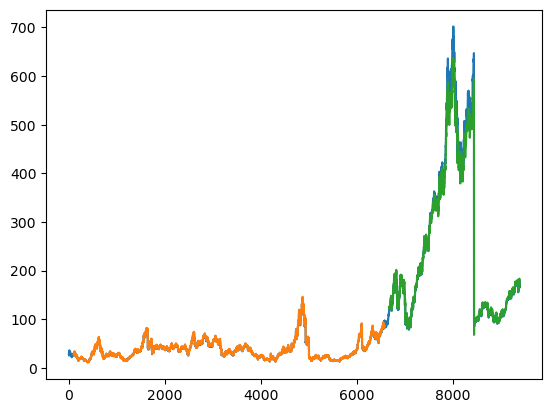

In [55]:
##Plotting
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]= train_predict
#Shift test predictions for plotting
testPredictPlot=np.empty_like(df)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :]= test_predict
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()